Скорость пули через закон сохранения импульса: 969.61 м/с
Скорость пули через закон сохранения энергии: 36.30 м/с
Результаты скоростей из закона импульса и энергии отличаются.


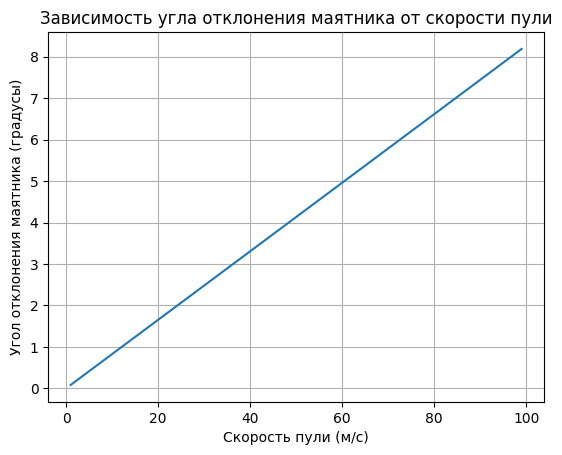

Для угла 5°: sin(alpha) ≈ alpha — True, tan(alpha) ≈ alpha — True


In [3]:
import math
import matplotlib.pyplot as plt


def velocity_by_momentum(m_p, M, v_M):
    return M*math.sqrt(2*L*(1-math.cos(math.radians(alpha))))/m_p


def velocity_by_energy(m_p, M, L, alpha):
    g = 9.81
    h = L * (1 - math.cos(math.radians(alpha)))
    return math.sqrt((2 * M * g * h) / m_p)


def angle_vs_velocity(m_p, M, L, v_p_range):
    g = 9.81
    angles = []
    for v_p in v_p_range:

        ratio = (m_p * v_p**2) / (2 * M * g * L)
        if ratio <= 2:
            alpha = math.degrees(math.acos(1 - ratio))
            angles.append(alpha)
        else:
            angles.append(None)
    return angles

def small_angle_approximation(alpha_degrees):
    alpha_radians = math.radians(alpha_degrees)
    sin_approx = math.isclose(math.sin(alpha_radians), alpha_radians, rel_tol=1e-2)
    tan_approx = math.isclose(math.tan(alpha_radians), alpha_radians, rel_tol=1e-2)
    return sin_approx, tan_approx


m_p = 0.01
M = 70.0
L = 7.0
alpha = 3


v_M = math.sqrt(2 * 9.81 * L * (1 - math.cos(math.radians(alpha))))


v_p_momentum = velocity_by_momentum(m_p, M, v_M)
print(f"Скорость пули через закон сохранения импульса: {v_p_momentum:.2f} м/с")


v_p_energy = velocity_by_energy(m_p, M, L, alpha)
print(f"Скорость пули через закон сохранения энергии: {v_p_energy:.2f} м/с")


if math.isclose(v_p_momentum, v_p_energy, rel_tol=1e-2):
    print("Результаты скоростей из закона импульса и энергии совпадают.")
else:
    print("Результаты скоростей из закона импульса и энергии отличаются.")


v_p_range = range(1, 100, 1)
angles = angle_vs_velocity(m_p, M, L, v_p_range)


valid_v_p_range = [v for v, a in zip(v_p_range, angles) if a is not None]
valid_angles = [a for a in angles if a is not None]

plt.plot(valid_v_p_range, valid_angles)
plt.xlabel('Скорость пули (м/с)')
plt.ylabel('Угол отклонения маятника (градусы)')
plt.title('Зависимость угла отклонения маятника от скорости пули')
plt.grid(True)
plt.show()


alpha_test = 5  #это в градусах
sin_approx, tan_approx = small_angle_approximation(alpha_test)
print(f"Для угла {alpha_test}°: sin(alpha) ≈ alpha — {sin_approx}, tan(alpha) ≈ alpha — {tan_approx}")
